In [17]:
import numpy as np
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

ra_input = float(input("Ra"))
dec_input = float(input("Dec",))
afov = float(input("Apparent FOV in degrees"))*0.017453304004166
f_objective = float(input("Focal length of Objective",))
f_eyepiece = float(input("Focal length of Eyepiece",))
d_telescope = float(input("Diameter in mm",))

fov = afov/(f_objective/f_eyepiece)
data = np.loadtxt("hygdata_v3.csv",delimiter=",",usecols = (23,24,16,33,9,13,6,15),dtype=np.str)
ra = data[:,0]
dec = data[:,1]
color_index = data[:,2]
lum = data[:,3]
dist = data[:,4]
mag = data[:,5]
name = data[:,6]
spect = data[:,7]

spect_type = np.array([x[:1] for x in spect])

#Some stars have their common name in the hipparcos data
name_ind_list = np.where(name!='')
name = name[name_ind_list]
name_x = ra[name_ind_list]
name_y = dec[name_ind_list]

m_limiting = float(3-2+2.5*np.log10(d_telescope*(f_objective/f_eyepiece)*0.9))

#Converting all strings to floats
ra = np.array([float(x) for x in ra])
dec = np.array([float(x) for x in dec])
color_index = np.array([float(x) if x!="" else 0 for x in color_index])
lum = np.array([float(x) for x in lum])
dist = np.array([float(x) for x in dist])
mag = np.array([float(x) for x in mag])
name_x = np.array([float(x) for x in name_x])
name_y = np.array([float(x) for x in name_y])

indices = np.where(mag<=m_limiting)

#converting ra values
ra = np.array([-(2*np.pi-x) if x>np.pi else x for x in ra])
name_x = np.array([-(2*np.pi-x) if x>np.pi else x for x in name_x])

ra_visible = ra[indices]
dec_visible = dec[indices]

#computing intensity for sake of marker sizes
intensity = lum/(dist**2)
norm_int = intensity/np.amax(intensity)
norm_int = norm_int[indices]

#color = np.array([x if x<2 else 2 for x in color])#not being used
#color = (color - np.amin(color))/(np.amax(color)-np.amin(color))

#filter only ra and dec values within fov

#print (norm_int)

Ra 1.54972911837132
Dec 0.129277631694194
Apparent FOV in degrees 100
Focal length of Objective 45
Focal length of Eyepiece 1
Diameter in mm 100


In [18]:
#Assigning colors according to spectral types
color = np.array(["blue" if x=="O" else "lightskyblue" if x=="B" else "azure" if x=="A" else "lightyellow" if x=="F" else "yellow" if x=="G" else "orange" if x=="K" else "red" if x=="M" else "white" for x in spect_type])
color_visible = color[indices]

Including Messier objects through script below:


In [19]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

import numpy as np
from astroquery.simbad import Simbad

Simbad.add_votable_fields('ra(d;A;ICRS;J2017.5;2000)', 'dec(d;D;ICRS;J2017.5;2000)')
result_table = Simbad.query_catalog("Messier")
ra_m = result_table['RA_d_A_ICRS_J2017_5_2000']
dec_m = result_table['DEC_d_D_ICRS_J2017_5_2000']
name_m = result_table['MAIN_ID']

ra_m = np.array([float(x) for x in ra_m])
dec_m = np.array([float(x) for x in dec_m])
name_m = np.array([str(x).strip("b") for x in name_m])

ra_m = [-(360-x)*(np.pi/180) if x>180 else x*(np.pi/180) for x in ra_m]
dec_m = [x*(np.pi/180) for x in dec_m]


["'M   1'" "'M   2'" "'M   3'" "'M   4'" "'M   5'" "'NGC  6405'"
 "'NGC  6475'" "'M   8'" "'M   9'" "'M  10'" "'NGC  6705'" "'M  12'"
 "'M  13'" "'M  14'" "'M  15'" "'M  16'" "'NGC  6618'" "'M  18'" "'M  19'"
 "'M  20'" "'M  21'" "'M  22'" "'M  23'" "'M  24'" "'IC 4725'" "'M  26'"
 "'M  27'" "'M  28'" "'M  29'" "'M  30'" "'M  31'" "'M  32'" "'M  33'"
 "'NGC  1039'" "'NGC  2168'" "'M  36'" "'M  37'" "'M  38'" "'NGC  7092'"
 "'M  40'" "'M  41'" "'M  42'" "'M  43'" "'NGC  2632'" "'Cl Melotte   22'"
 "'NGC  2437'" "'NGC  2422'" "'NGC  2548'" "'M  49'" "'NGC  2323'"
 "'M  51'" "'M  52'" "'M  53'" "'M  54'" "'M  55'" "'M  56'" "'M  57'"
 "'M  58'" "'M  59'" "'M  60'" "'M  61'" "'M  62'" "'M  63'" "'M  64'"
 "'M  65'" "'M  66'" "'NGC  2682'" "'M  68'" "'M  69'" "'M  70'" "'M  71'"
 "'M  72'" "'M  73'" "'M  74'" "'M  75'" "'M  76'" "'M  77'" "'M  78'"
 "'M  79'" "'M  80'" "'M  81'" "'M  82'" "'M  83'" "'M  84'" "'M  85'"
 "'M  86'" "'M  87'" "'M  88'" "'M  89'" "'M  90'" "'M  91'" "'M  92'"
 "

Including constellation boundary

In [27]:
from astroquery.vizier import Vizier
catalogue_list = Vizier.find_catalogs("Constellation")
Vizier.ROW_LIMIT = -1

catalog = Vizier.get_catalogs("VI/49")
ra_cb = catalog[1]['RAJ2000']
dec_cb = catalog[1]['DEJ2000']
ra_cb = np.array([float(x) for x in ra_cb])
dec_cb = np.array([float(x) for x in dec_cb])

ra_cb = [-(360-x)*(np.pi/180) if x>180 else x*(np.pi/180) for x in ra_cb]
dec_cb = [x*(np.pi/180) for x in dec_cb]


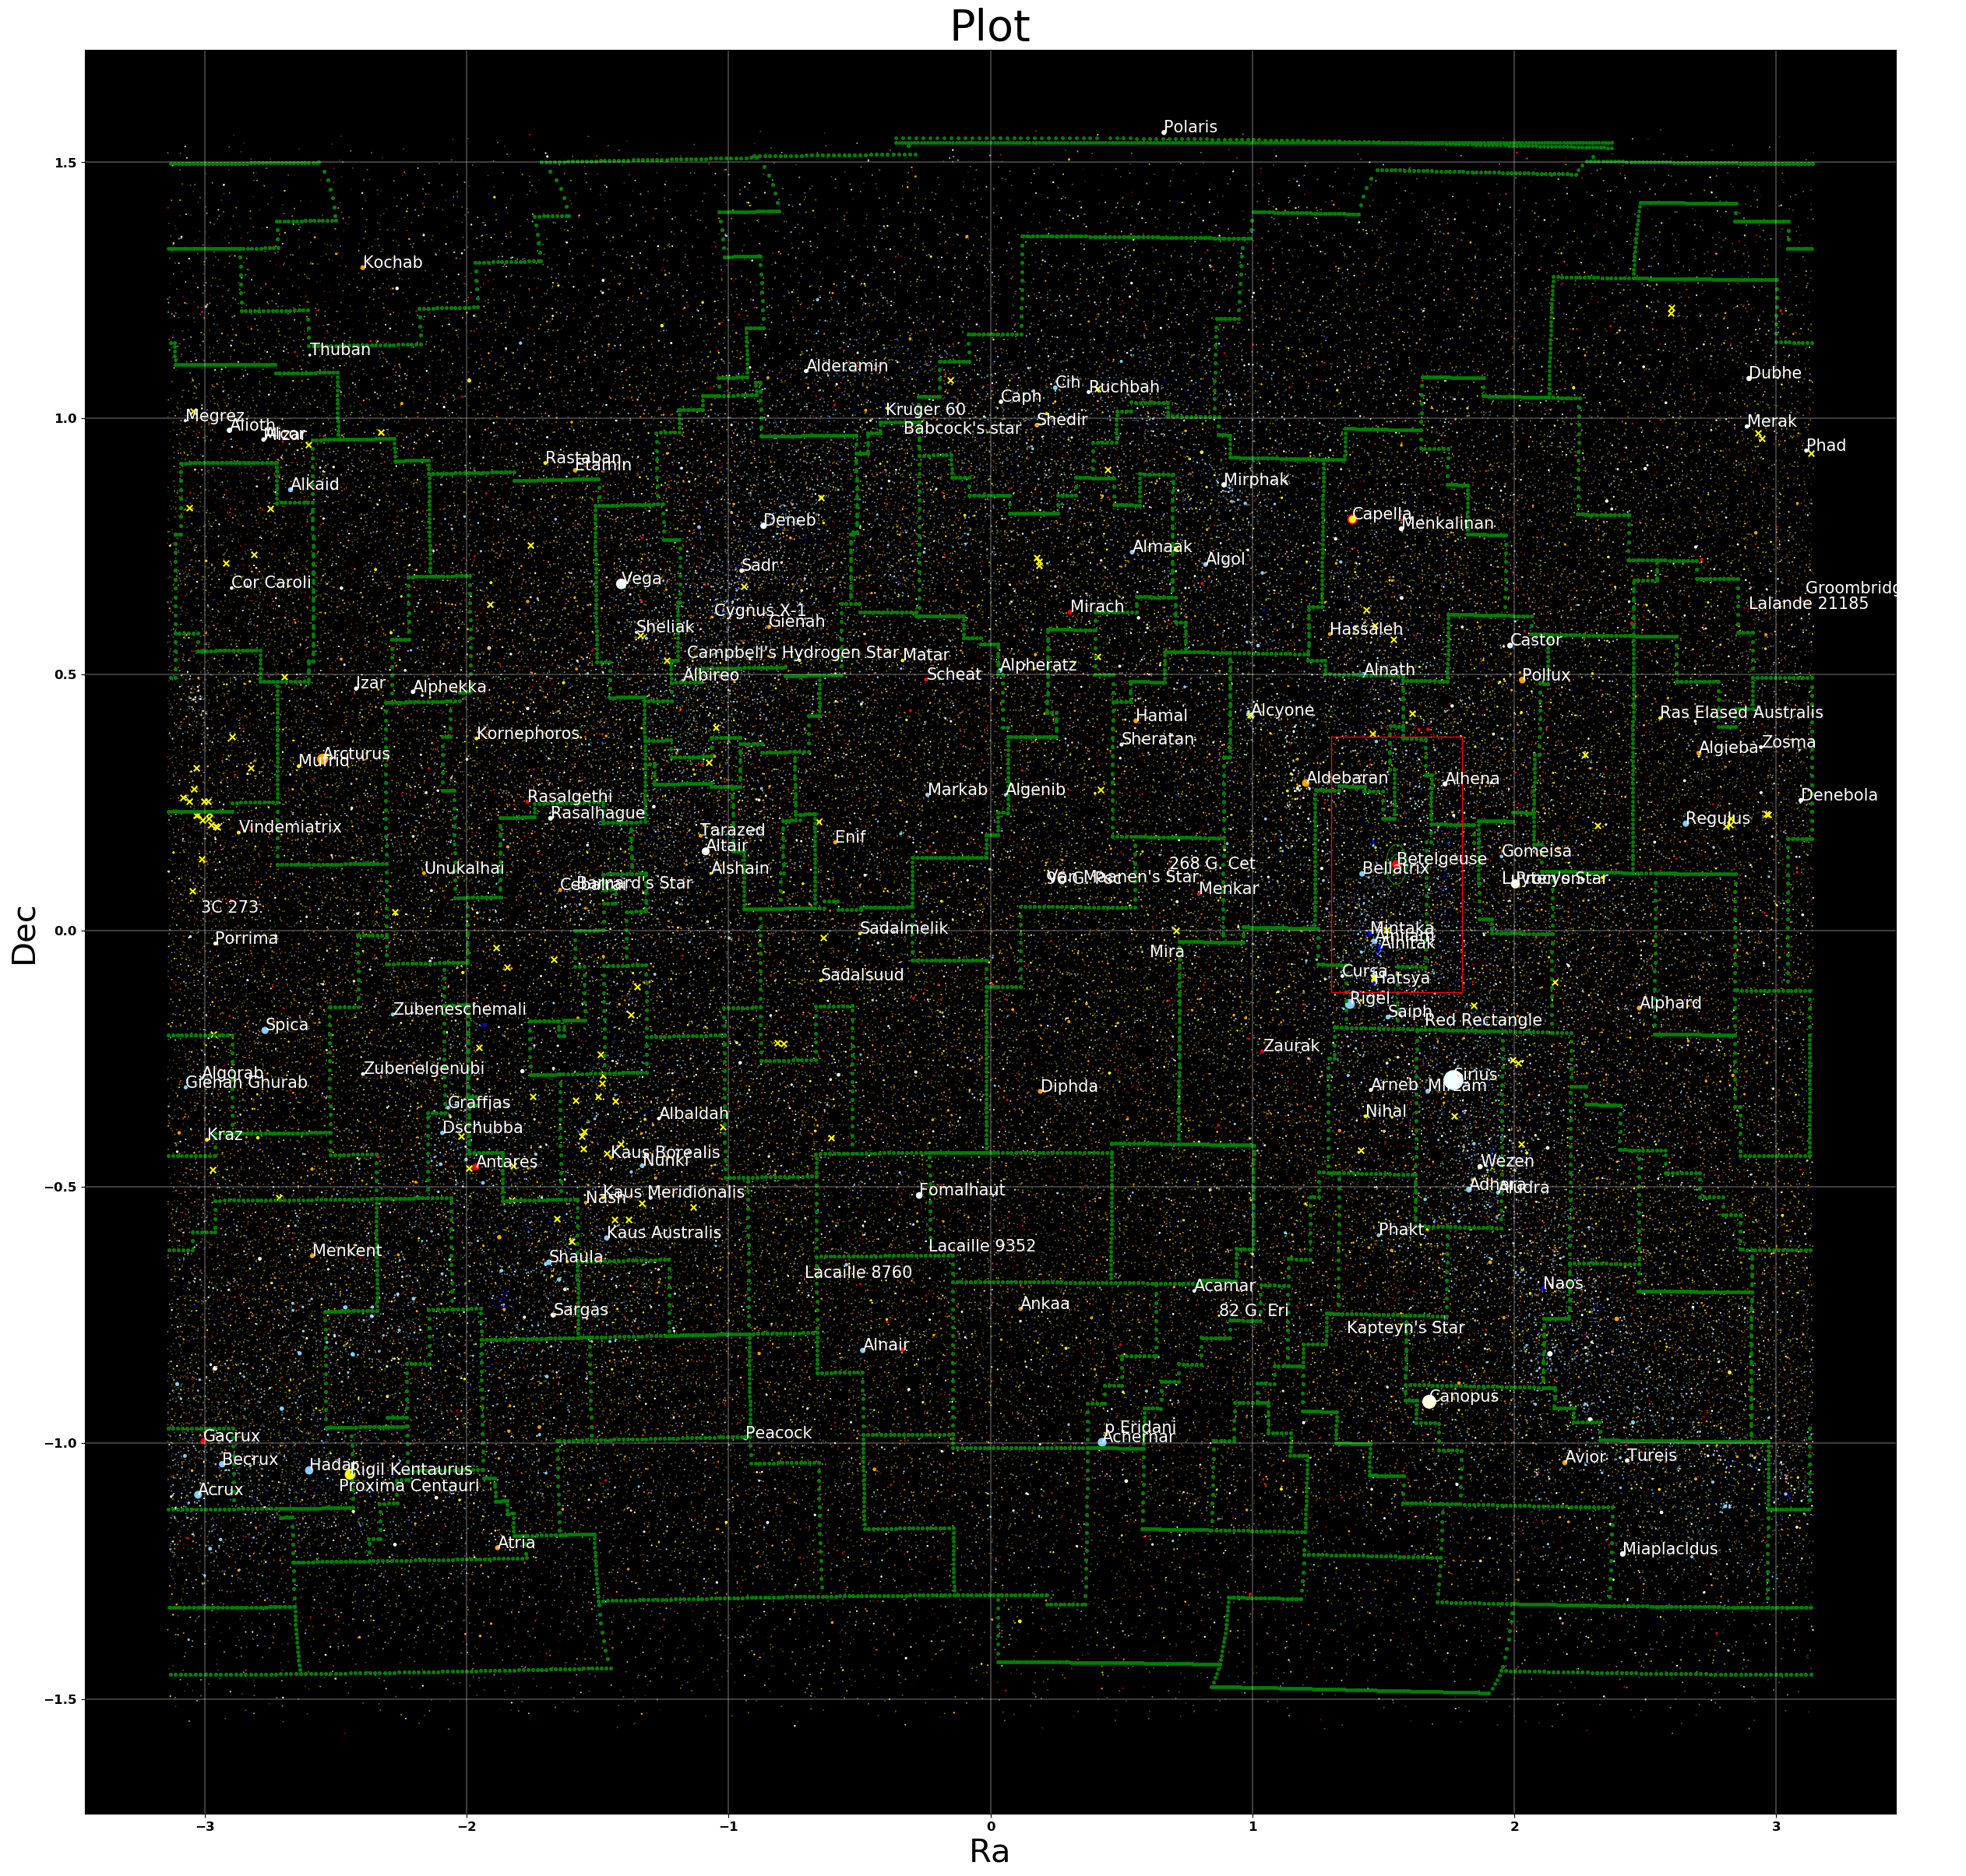

In [29]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize=(30,30),dpi=100,facecolor='white',constrained_layout=False)
ax = fig.add_subplot(111,facecolor = "k")

#To show only names of stars within fov
reduced_index = np.where(name_x<ra_input+0.25)
reduced_index = np.where(name_x[reduced_index]>ra_input-0.25)

for i,txt in enumerate(name):
    ax.annotate(txt, (name_x[i],name_y[i]),color="white",xycoords='data',size=15)

ax.scatter(ra_visible,dec_visible,s=norm_int*300,color = color_visible)
bx1 = patches.Rectangle(xy=(ra_input-0.25,dec_input-0.25),width=0.5,height=0.5,fill=False,edgecolor="red")
circle_in = plt.Circle((ra_input,dec_input),fov/2,color="green",fill=False,label="{}".format(fov/2))
circle_out = plt.Circle((ra_input,dec_input),fov,color="green",fill=False,label="{}".format(fov))
ax.add_artist(circle_in)
ax.add_artist(circle_out)
ax.add_patch(bx1)

ax.grid(True,linewidth=0.35,color='w')
#ax.set_xlim([ra_input-0.25,ra_input+0.25])
#ax.set_ylim([dec_input-0.25,dec_input+0.25])
ax.set_ylabel("Dec",size=30)
ax.set_xlabel("Ra",size=30)
ax.set_title("Plot",size=40)
for tick in ax.xaxis.get_ticklabels():
    tick.set_weight("bold")
    tick.set_fontsize("large")
for tick in ax.yaxis.get_ticklabels():
    tick.set_weight("bold")
    tick.set_fontsize("large")
    
#THE MESSIER OBJECTS ADDED HERE
ax.scatter(ra_m,dec_m,marker = "x",s=30,color = "yellow")
#for i,txt in enumerate(name_m):
#    ax.annotate(txt, (ra_m[i],dec_m[i]),color="yellow",xycoords='data',size=15)

#THE CONSTELLATION BOUNDARIES ADDED HERE
ax.scatter(ra_cb,dec_cb,marker = ".",s=25,color = "green")

#make a patch rectangle in which i can show the zoomed in plot
#bx2 = patches.Rectangle(xy=(1.5,1.2),width=1.6,height=0.5,fill=False,edgecolor="white")
#ax.add_patch(bx2)
#plt.savefig("ex",bbox_inches="tight",facecolor="gray")

#use add axes to show zoomed in thing
#ax2 = fig.add_axes([0.65,0.75,0.2,0.12])
#ax2.set_facecolor("black")
#ax2.scatter(ra_visible,dec_visible,s=norm_int*300,color = color_visible)
#circle_in = plt.Circle((ra_input,dec_input),fov/2,color="green",fill=False,label="{}".format(fov/2))
#circle_out = plt.Circle((ra_input,dec_input),fov,color="green",fill=False,label="{}".format(fov))
#ax2.add_artist(circle_in)
#ax2.add_artist(circle_out)
#ax2.set_xlim([ra_input-0.25,ra_input+0.25])
#ax2.set_ylim([dec_input-0.25,dec_input+0.25])
#for spine in ax2.spines.values():
#    spine.set_edgecolor("white")
#    spine.set_linewidth("4")
    
plt.savefig("ex")

In [ ]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(30,30))
ax= fig.add_subplot(111)
m = Basemap(width=12000000,height=8000000,projection = "stere",lon_0 = -45, lat_0=90,resolution = "l",lat_ts=90)
x1,y1 = m((ra_input-fov)*180/np.pi,(dec_input-fov)*180/np.pi)
x2,y2 = m((ra_input-fov)*180/np.pi,(dec_input+fov)*180/np.pi)
m.drawmapboundary(fill_color="black")
parallels = np.arange(-90,90,15)
meridians = np.arange(-180,180,15)
x,y = m(ra*180/np.pi,dec*180/np.pi)
m.drawparallels(parallels,color="white")
m.drawmeridians(meridians,color="white")
m.scatter(x,y,s=norm_int*500,marker='o',color='white')
for i,txt in enumerate(name):
    nx,ny = m(name_x[i]*180/np.pi,name_y[i]*180/np.pi)
    ax.annotate(txt, (nx,ny),color="white",xycoords='data',size=15)
#ax.set_xlim([x1,x2])
#ax.set_ylim([y1,y2])
plt.show()